## Traveling Salesman Problem - Random Sample

### Import Packages

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

### Inputs

In [3]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of cities
n=100

#Coordinate Range
rangelct=10000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#Compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

distancelct[np.diag_indices_from(distancelct)] = 99999



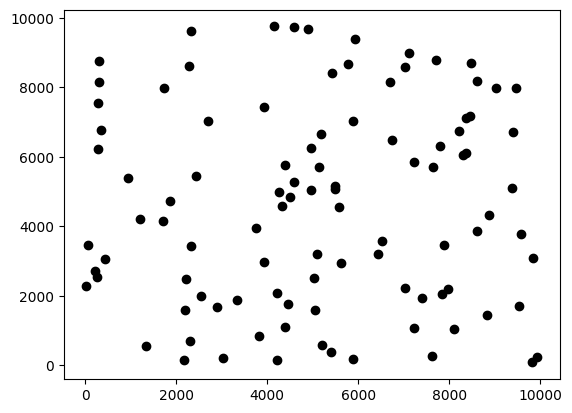

In [4]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Solution Representation and Initial Solution

In [5]:
random.seed(1)
Solution_i=random.sample(list(range(n)), n)
print(Solution_i)

[17, 72, 97, 8, 32, 15, 63, 57, 60, 83, 48, 26, 12, 62, 3, 49, 55, 77, 0, 92, 34, 29, 75, 13, 40, 85, 2, 74, 69, 1, 89, 27, 54, 98, 28, 56, 93, 35, 14, 22, 61, 43, 59, 71, 78, 18, 70, 88, 86, 41, 6, 11, 82, 46, 67, 7, 21, 95, 68, 42, 87, 19, 45, 31, 47, 25, 73, 30, 94, 23, 79, 39, 76, 58, 5, 64, 99, 91, 52, 24, 33, 80, 16, 66, 90, 96, 50, 84, 36, 44, 81, 10, 9, 38, 20, 4, 51, 65, 37, 53]


In [6]:
dfSolution_i=pd.DataFrame(Solution_i)
dfSolution_i
dflinkindex_p1=dfSolution_i
dflinkindex_p2=dfSolution_i.shift(-1)
dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
linkindex_p1=dflinkindex_p1.to_numpy()
linkindex_p2=dflinkindex_p2.to_numpy()
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)
linkindex_p1=linkindex_p1.transpose()[0]
linkindex_p2=linkindex_p2.transpose()[0]


In [7]:
pd.concat([dflinkindex_p1, dflinkindex_p2], axis=1)

,0,0
0,17,72.0
1,72,97.0
2,97,8.0
3,8,32.0
4,32,15.0
...,...,...
95,4,51.0
96,51,65.0
97,65,37.0
98,37,53.0


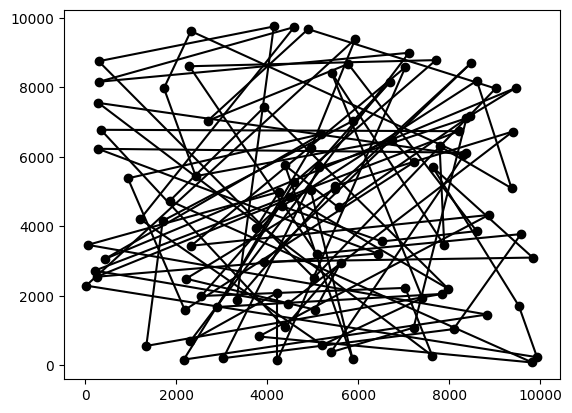

In [8]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])
    
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

In [9]:
#Compute Objective Value
ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
ObjValue

508089.55416686134

### Random Algorithm

In [1]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 

while cputime_i[-1]<20:
    
    iteration=iteration+1
    
    #Random permutation
    Solution_i=random.sample(list(range(n)), n)
    dfSolution_i=pd.DataFrame(Solution_i)
    dfSolution_i
    dflinkindex_p1=dfSolution_i
    dflinkindex_p2=dfSolution_i.shift(-1)
    dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
    linkindex_p1=dflinkindex_p1.to_numpy()
    linkindex_p2=dflinkindex_p2.to_numpy()
    linkindex_p1=linkindex_p1.astype(int)
    linkindex_p2=linkindex_p2.astype(int)
    linkindex_p1=linkindex_p1.transpose()[0]
    linkindex_p2=linkindex_p2.transpose()[0]
    
    #Compute Objective Value
    ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolution=copy.deepcopy(Solution_i)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
    print(ObjValueOpt)
    
    #Code for Updating Plot
    for i_index in range(len(linkindex_p2)): 
        connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');

    clear_output(wait=True)
    plt.draw()
    plt.pause(0.1)
    plt.clf()
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

NameError: name 'random' is not defined

### Read output variables

In [32]:
min(Objvalue_list)

477878.6176337704

### Plot results

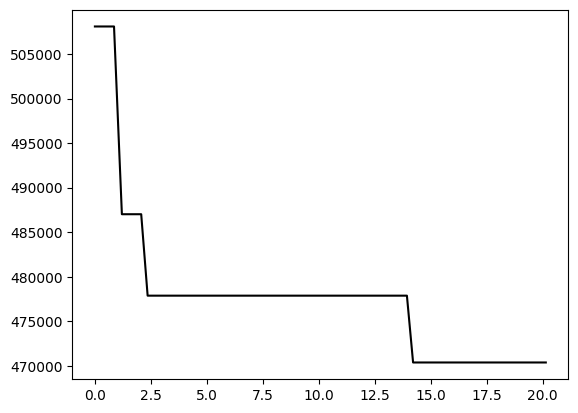

In [11]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

In [12]:
solutiondf=pd.DataFrame(cputime_i[range(len(Objvalue_list))],Objvalue_list)

#solutiondf.to_csv('SolDf_Random500.csv',index=True)

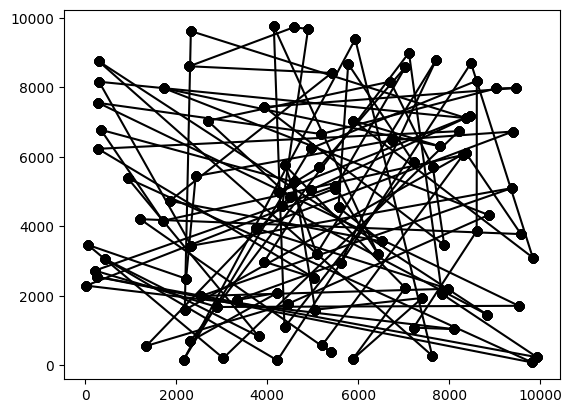

In [13]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');
